In [205]:
import pandas as pd
import numpy as np

In [2]:
## Fetch dataset
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-09-29 13:32:01--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  4.77MB/s    in 0.3s    

2023-09-29 13:32:04 (4.77 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [237]:
df = pd.read_csv("housing.csv")

In [238]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [240]:
df.median_house_value.value_counts()

median_house_value
500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
359200.0      1
54900.0       1
377600.0      1
81200.0       1
47000.0       1
Name: count, Length: 3842, dtype: int64

<Axes: ylabel='Frequency'>

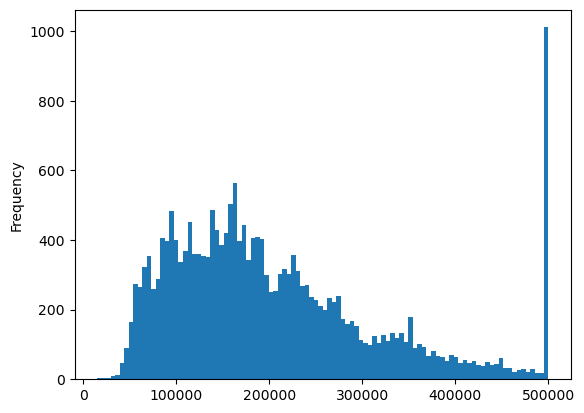

In [241]:
df.median_house_value.plot.hist(bins = 100)

No the median house value data does not follow a long tail distribution

In [242]:
df_relevant = df[(df['ocean_proximity']=='<1H OCEAN') | (df['ocean_proximity']=='INLAND')].copy()
df_relevant = df_relevant.reset_index(drop = True)

relevant_columns = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
]

df_relevant = df_relevant[relevant_columns].copy()
df_relevant

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
1,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
2,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
3,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
4,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
15682,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
15683,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
15684,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
15685,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [243]:
df_relevant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15687 entries, 0 to 15686
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            15687 non-null  float64
 1   longitude           15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB


Total bedrooms is the feature with missing values.

In [244]:
df_relevant.population.median()

1195.0

In [245]:
np.median(df_relevant.population.to_list())

1195.0

## Prepare and split the dataset
Shuffle the dataset (the filtered one you created above), use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.
Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [246]:
#Applying the log1p transformation
df_relevant['median_house_value_log1p'] = df_relevant['median_house_value'].apply(lambda x:
                                                                            np.log1p(x))

df_relevant.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,median_house_value_log1p
0,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,12.973866
1,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,12.287657
2,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,12.419574
3,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,12.554971
4,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,12.287196


In [247]:
n - (n_val+n_test)

12384

In [248]:
#Validation, train, test split

n = len(df_relevant)

n_val = int(0.2*n)
n_test = int(0.2*n)
n_train = int(n - (n_val+n_test))

In [249]:
n_train, int(0.6*n)

(9413, 9412)

In [250]:
## Shuffling dataset

idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)

df_train = df_relevant.iloc[idx[:n_train]].reset_index(drop=True)
df_test = df_relevant.iloc[idx[n_train:n_train+n_test]].reset_index(drop=True)
df_val = df_relevant.iloc[idx[n_train+n_test:n_train+n_test+n_val]].reset_index(drop=True)

In [251]:
y_train = df_train.median_house_value_log1p.values
y_val = df_val.median_house_value_log1p.values
y_test = df_test.median_house_value_log1p.values

In [252]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

del df_train['median_house_value_log1p']
del df_val['median_house_value_log1p']
del df_test['median_house_value_log1p']

## Linear Regression function

In [253]:
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

def linear_regression(xi, w_new):
    xi = [1] + xi
    return dot(xi, w_new)

def LinearRegression(X, w_new):
    return X.dot(w_new)

In [254]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

linear_regression(xi, w_new)

12.312

In [255]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)

LinearRegression(X, w_new)

array([12.38 , 13.552, 12.312])

In [256]:
def train_linear_regression(X, y):
    X = np.array(X)

    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    w0 = w_full[0]
    w = w_full[1:]
    
    return w0, w

def prepare_X(df, fillna_value):
    df = df.fillna(fillna_value)
    X = df.values
    return X

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [257]:
## Training model - NA fill = 0
X_train = prepare_X(df_train, fillna_value=0)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, fillna_value=0)
y_pred = w_0 + X_val.dot(w)

rmse(y_val, y_pred)

0.33054478646237506

In [258]:
## Training model - NA fill = mean
mean = df_train.total_bedrooms.mean()

X_train = prepare_X(df_train, fillna_value=mean)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, fillna_value=mean)
y_pred = w_0 + X_val.dot(w)

rmse(y_val, y_pred)

0.3301563875989306

## Regularised Linear Regression

In [259]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [260]:
r_list = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]


for r in r_list:
    X_train = prepare_X(df_train, fillna_value=0)
    w_0, w = train_linear_regression_reg(X_train, y_train, r)

    X_val = prepare_X(df_val, fillna_value=0)
    y_pred = w_0 + X_val.dot(w)

    print('------')
    print('Regularised coefficient', r)
    print('Root mean Squared Error', np.round(rmse(y_val, y_pred), 2))

------
Regularised coefficient 0
Root mean Squared Error 0.33
------
Regularised coefficient 1e-06
Root mean Squared Error 0.33
------
Regularised coefficient 0.0001
Root mean Squared Error 0.33
------
Regularised coefficient 0.001
Root mean Squared Error 0.33
------
Regularised coefficient 0.01
Root mean Squared Error 0.33
------
Regularised coefficient 0.1
Root mean Squared Error 0.33
------
Regularised coefficient 1
Root mean Squared Error 0.33
------
Regularised coefficient 5
Root mean Squared Error 0.34
------
Regularised coefficient 10
Root mean Squared Error 0.34


## Change Seed

In [264]:
seed_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_score = []
for seed in seed_list:
    
    idx = np.arange(n)

    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df_relevant.iloc[idx[:n_train]].reset_index(drop=True).copy()
    df_val = df_relevant.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True).copy()
    df_test = df_relevant.iloc[idx[n_train+n_val:]].reset_index(drop=True).copy()
    
    
    y_train = df_train.median_house_value_log1p.values
    y_test = df_test.median_house_value_log1p.values
    y_val = df_val.median_house_value_log1p.values
    
    del df_train['median_house_value']
    del df_test['median_house_value']
    del df_val['median_house_value']

    del df_train['median_house_value_log1p']
    del df_test['median_house_value_log1p']
    del df_val['median_house_value_log1p']
    
    X_train = prepare_X(df_train, fillna_value=0)
    X_val = prepare_X(df_val, fillna_value=0)
    
    w_0, w = train_linear_regression(X_train, y_train)
    y_pred = w_0 + X_val.dot(w)

    print('----')
    print(seed, rmse(y_val, y_pred))
    rmse_score.append(rmse(y_val, y_pred))

----
0 0.33773871601241534
----
1 0.33779993536620034
----
2 0.33842870067702435
----
3 0.3320049468307805
----
4 0.3394451862556948
----
5 0.34338197052658526
----
6 0.33853302117707845
----
7 0.3468747697304975
----
8 0.35127368659561153
----
9 0.334155826651761


In [265]:
np.std(rmse_score)

0.005465718180550712

## Combine training and validation set

In [268]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_train = df_relevant.iloc[idx[:n_train+n_val]].reset_index(drop=True).copy()
df_test = df_relevant.iloc[idx[n_train+n_val:]].reset_index(drop=True).copy()


y_train = df_train.median_house_value_log1p.values
y_test = df_test.median_house_value_log1p.values


del df_train['median_house_value']
del df_test['median_house_value']

del df_train['median_house_value_log1p']
del df_test['median_house_value_log1p']

X_train = prepare_X(df_train, fillna_value=0)
X_test = prepare_X(df_test, fillna_value=0)

w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)
y_pred = w_0 + X_test.dot(w)

print('----')
print(seed, rmse(y_test, y_pred))

----
9 0.3349899336608947
